<a href="https://colab.research.google.com/github/prashanth018/Text-Summarization/blob/Dyuthi/Copy_of_Text_summarization_using_word_frequencies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import bs4 as bs
import urllib.request
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
!pip install rouge_metric

     |████████████████████████████████| 153kB 6.3MB/s 


In [3]:
!pip install fuzzywuzzy

In [4]:
!pip install python-Levenshtein

     |████████████████████████████████| 51kB 2.8MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149806 sha256=1f6a1d9084fc1a88d23da9c5dad110d3737b3ee7e257d9598bdba76d2a9957ca
  Stored in directory: /root/.cache/pip/wheels/b3/26/73/4b48503bac73f01cf18e52cd250947049a7f339e940c5df8fc
Successfully built python-Levenshtein


In [5]:
def casefolding(sentence):
    return sentence.lower()

def cleaning(sentence):
    return re.sub(r'[^a-z]', ' ', re.sub("’", '', sentence))

def tokenization(sentence):
    return sentence.split()

In [6]:
def sentence_split(paragraph):
    return nltk.sent_tokenize(paragraph)

In [7]:
def word_freq(data):
    w = []
    for sentence in data:
        for words in sentence:
            w.append(words)
    bag = list(set(w))
    res = {}
    for word in bag:
        res[word] = w.count(word)
    return res


In [8]:
news = '''
O'Sullivan could run in Worlds
Sonia O'Sullivan has indicated that she would like to participate in next month's World Cross Country Championships in St Etienne.
Athletics Ireland have hinted that the 35-year-old Cobh runner may be included in the official line-up for the event in France on 19-20 March. 
Provincial teams were selected after last Saturday's Nationals in Santry and will be officially announced this week. 
O'Sullivan is at present preparing for the London marathon on 17 April. 
The participation of O'Sullivan, currentily training at her base in Australia, would boost the Ireland team who won the bronze three years agio. 
The first three at Santry last Saturday, Jolene Byrne, Maria McCambridge and Fionnualla Britton, are automatic selections and will most likely form part of the long-course team. 
O'Sullivan will also take part in the Bupa Great Ireland Run on 9 April in Dublin. 
'''

In [9]:
def summarize(news):
  sentence_list = sentence_split(str(news))
  data = []
  for sentence in sentence_list:
      data.append(tokenization(cleaning(casefolding(sentence))))
  data = (list(filter(None, data)))
  wordfreq = word_freq(data)
  ranking = []
  for words in data:
      temp = 0
      for word in words:
          temp += wordfreq[word]
      ranking.append(temp)
  n = 2
  result = ''
  sort_list = np.argsort(ranking)[::-1][:n]
  #print(sort_list)
  for i in range(n):
      result += '{} '.format(sentence_list[sort_list[i]])
  return result

In [10]:
result = summarize(news)
hypotheses = list()
hypotheses.append(result.split())

In [11]:
actual_summary = '''
The participation of O'Sullivan, currentily training at her base in Australia, would boost the Ireland team who won the bronze three years agio.
O'Sullivan will also take part in the Bupa Great Ireland Run on 9 April in Dublin.
O'Sullivan is at present preparing for the London marathon on 17 April.
'''

In [12]:
references = list()
references.append(actual_summary.split())

In [13]:
from rouge_metric import PyRouge
rouge = PyRouge(rouge_n=(1, 2, 4), rouge_l=True, rouge_w=True,
                rouge_w_weight=1.2, rouge_s=True, rouge_su=True, skip_gap=4)
scores = rouge.evaluate_tokenized(hypotheses, references)
print(scores)

{'rouge-1': {'r': 0.9718875502008032, 'p': 0.019689203482222764, 'f': 0.03859649122807018}, 'rouge-2': {'r': 0.8585858585858586, 'p': 0.013888888888888888, 'f': 0.027335584499115613}, 'rouge-4': {'r': 0.7037037037037037, 'p': 0.006261328060636019, 'f': 0.012412216233872285}, 'rouge-l': {'r': 0.9718875502008032, 'p': 0.019689203482222764, 'f': 0.03859649122807018}, 'rouge-w-1.2': {'r': 0.7270575698607228, 'p': 0.01518870040037385, 'f': 0.029755783342781447}, 'rouge-s4': {'r': 0.9182282793867121, 'p': 0.008881199538638985, 'f': 0.01759224505116112}, 'rouge-su4': {'r': 0.9312101910828026, 'p': 0.010023310023310023, 'f': 0.019833141151733024}}


In [16]:
from fuzzywuzzy import fuzz
fuzz_ratio = fuzz.ratio(result, actual_summary)
fuzz_ratio

71

In [17]:
#for BBC Dataset
from google.colab import files
uploaded = files.upload()

Saving BBCDataset.csv to BBCDataset.csv


In [19]:
import pandas as pd

# Run summarization
dataset = pd.read_csv('BBCDataset.csv', encoding ='cp1252')
story = dataset['story'].iloc[0:30]
original_summary  = dataset['Summary'].iloc[0:30]

In [20]:
summary_list = list()
for news in story:
  #print(news)
  #print('...............')
  result = summarize(news)
  summary_list.append(result)

In [21]:
hypotheses = list()
hypotheses = summary_list
hypotheses

['She will also run in the Grand Prix in Birmingham in February and may defend her indoor AAA 800m title in Sheffield earlier that month. She added: "These events are also a great opportunity to thank the British public for the enormous levels of support they have given me from the moment I stepped off that plane from Greece." ',
 'The IAAF - which said it was "very surprised" by the decision of the Greek tribunal - is deciding whether to appeal against the decision at the Court of Arbitration for Sport. However, Dick Pound, the chairman of the World Anti-Doping Authority, has said he will appeal against the decision if the IAAF does not. ',
 "The return to fitness of Darius Vassell after four months out with a broken ankle and the emergence of Luke Moore has alleviated some of the Villa's manager's problems in that department. Cole, who also struggled with an ankle problem earlier in the season, was unable to rest because O'Leary had a shortage of strikers. ",
 '"This award is not jus

In [22]:
references = list()
for i in original_summary:
  references.append(i)
references

["Holmes will make her first track appearance on home soil since winning double Olympic gold in January's Norwich Union International in Glasgow.The Glasgow meeting will see Holmes compete over 1500m in a five-way match against Sweden, France, Russia and Italy.She will also run in the Grand Prix in Birmingham in February and may defend her indoor AAA 800m title in Sheffield earlier that month.",
 'Thanou, 30, was provisionally suspended for missing a test before the Olympics, but the decision was overturned.The IAAF - which said it was "very surprised" by the decision of the Greek tribunal - is deciding whether to appeal against the decision at the Court of Arbitration for Sport.Greek sprinter Katerina Thanou says she is eager to compete again after being cleared of missing a drugs test by an independent Greek tribunal.Thanou, 30, and her compatriot Kostas Kenteris were provisionally suspended by the IAAF in December for missing three drugs tests."The IAAF will decide if we can compete

In [23]:
from rouge_metric import PyRouge
rouge = PyRouge(rouge_n=(1, 2, 4), rouge_l=True, rouge_w=True,
                rouge_w_weight=1.2, rouge_s=True, rouge_su=True, skip_gap=4)

scores = rouge.evaluate_tokenized(hypotheses, references)
print(scores)

{'rouge-1': {'r': 0.9792609932405971, 'p': 0.0030830280177583783, 'f': 0.00614670423705799}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-4': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.9792609932405971, 'p': 0.0030830280177583783, 'f': 0.00614670423705799}, 'rouge-w-1.2': {'r': 0.9826742478405974, 'p': 0.003094280637931066, 'f': 0.006169135675653424}, 'rouge-s4': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-su4': {'r': 0.0, 'p': 0.0, 'f': 0.0}}


In [24]:
from fuzzywuzzy import fuzz
fuzzy_ratio_list = []
for i in range(len(hypotheses)):
  fuzz_ratio = fuzz.ratio(hypotheses[i],references[i])
  print(fuzz_ratio)
  fuzzy_ratio_list.append(fuzz_ratio)

39
47
68
36
48
54
82
33
43
55
56
26
42
47
39
19
46
34
82
43
38
72
65
32
49
49
48
31
82
41


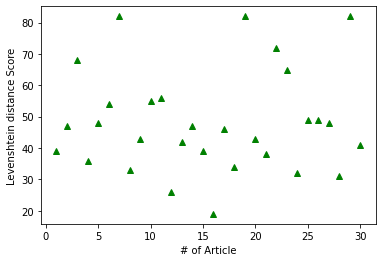

In [25]:
import matplotlib.pyplot as plt
p2 = plt.plot([1, 2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30], fuzzy_ratio_list, 'g ^', label="bert")
plt.ylabel('Levenshtein distance Score')
plt.xlabel('# of Article')
#plt.legend(handles=[p2], title='title', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()